In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize

data= pd.read_csv("ex2data2.txt", header=None)

m=data.shape[0]#no. of training examples
n=data.shape[1]-1 #no. of parameters

X, y = np.array(data[list(range(n))]), np.array(data[n]).reshape(m,1)

In [2]:
#PLOTTING PREPARATION
pos= data.loc[y==1]
neg= data.loc[y==0]
neg

,0,1,2
58,0.183760,0.933480,0
59,0.224080,0.779970,0
60,0.298960,0.619150,0
61,0.506340,0.758040,0
62,0.615780,0.728800,0
63,0.604260,0.597220,0
64,0.765550,0.502190,0
65,0.926840,0.363300,0
66,0.823160,0.275580,0
67,0.961410,0.085526,0


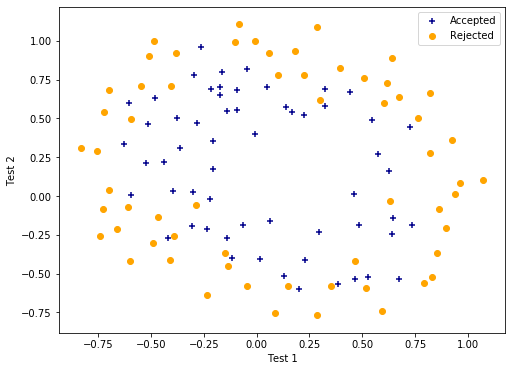

In [3]:
#PLOTTING BEGINS
plt.figure(figsize=(8,6))
plt.scatter(pos.loc[:,0],pos.loc[:,1],color='darkblue',marker='+',label='Accepted')
plt.scatter(neg.loc[:,0],neg.loc[:,1],color='orange',marker='o',label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.show();

In [4]:
#We are trying to generate a 6th degree polynomial so, we'll need to generate the feature matrix of the polynomial
degree=6
x1, x2=X[:,0], X[:,1]

featmatrix=np.ones(m).reshape(m,1)
features=0

for i in range(1,degree+1):
    for j in range(i+1):
        terms=(x1**(i-j)*x2**(j)).reshape(m,1)
        featmatrix=np.hstack((featmatrix,terms))
        features+=1
featmatrix.shape
#print(features)


(118, 28)

In [5]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [6]:
def costFunction(theta, X, y, lambda_):
    h=sigmoid(np.matmul(featmatrix,theta)) #Hypothesis
    
    J= -sum(y*np.log(h)+ (1-y)*np.log(1-h))/m + (lambda_*sum(theta**2)/2)/m #Cost + Regularization
    
    grad= np.dot(np.transpose(featmatrix),h-y)/m + lambda_*theta/m
    
    return J, grad

In [7]:
#We're setting lamba=1 since lambda is a keywprd in python we name the varibale lambda_

X_aug=np.insert(X,0,1,axis=1)
initial_theta=np.zeros(features+1).reshape(features+1,1)
J, grad= costFunction(initial_theta, featmatrix, y, 1)
initial_theta.shape

(28, 1)

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters,lambda_):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        J, grad = costFunction(theta,X,y,lambda_)
        theta= theta - (alpha * grad)
        J_history.append(J)
    
    return theta , J_history

In [9]:
 h=sigmoid(np.matmul(featmatrix,initial_theta))
grad= np.matmul(np.transpose(featmatrix),h-y)/m + 0.5*initial_theta/m
grad.shape
#y.shape

(28, 1)

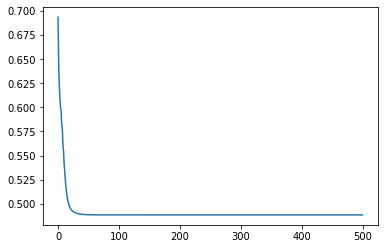

(28, 1)

In [10]:
theta, J_history=gradientDescent(X_aug,y,initial_theta,7,500,0.5)
plt.plot(J_history)
plt.show();
theta.shape

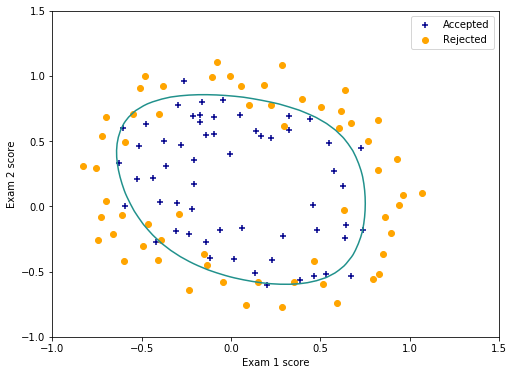

In [11]:
#PLOTTING DECISION BOUNDARY PLEASE READ, IT'S TOUGH!
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

plt.figure(figsize=(8,6))
plt.scatter(pos.loc[:,0],pos.loc[:,1],color='darkblue',marker='+',label='Accepted')
plt.scatter(neg.loc[:,0],neg.loc[:,1],color='orange',marker='o',label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =np.matmul(mapFeaturePlot(u_vals[i],v_vals[j],6),theta) 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show();

In [12]:
def predict(featmatrix):
    return (np.dot(featmatrix,theta))>0

In [13]:
p=predict(featmatrix)
efficiency=sum(p==y)/m
print(efficiency)

[0.8220339]
